In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## Problem 2

Let $T$ denote the triangle with vertices $(0,0), (2,0)$ and
    $(2,2)$. Let 
    $$
    f(x,y) = 
    \begin{cases}
        \sin^2(\pi xy) & \text{if (x,y)} \in T, \\
        0 & \text{otherwise.}
    \end{cases}
    $$


(a) Generate 2000 uniformly distributed points in $T$ and plot the outcome.

(b) Using the acceptance-rejection method, generate 2000 points in $T$ which are distributed according to the probability density function of the form $f/C$, where $C > 0$ is a normalizing constant, but without calculating the value of $C$. Plot the outcome.


## (a) Method 1: weighting

In [2]:
x = np.random.uniform(0, 1, 2000) # Generate x-axis ~ U[0,1]
y = np.random.uniform(0, 1, 2000) # Generate y-axis ~ U[0,1]

v1 = (0,0) # Vertice 1
v2 = (2,0) # Vertice 2
v3 = (2,2) # Vertice 3

q = np.abs(x-y)
s, t, u = q, 0.5 * (x + y - q), 1 - 0.5 * (q + x + y)

xs = s * v1[0] + t * v2[0] + u * v3[0]
ys = s * v1[1] + t * v2[1] + u * v3[1]

## (a) Method 2: Discard

In [3]:
# Function to check if the point is inside the triangle (vertices v1, v2, v3) or not
def inside(A, B, C, P):
    # Calculate the barycentric coordinates
    # of point P with respect to triangle ABC
    denominator = ((B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1]))
    a = ((B[1] - C[1]) * (P[0] - C[0]) + (C[0] - B[0]) * (P[1] - C[1])) / denominator
    b = ((C[1] - A[1]) * (P[0] - C[0]) + (A[0] - C[0]) * (P[1] - C[1])) / denominator
    c = 1 - a - b

    # Check if all barycentric coordinates are non-negative
    if a >= 0 and b >= 0 and c >= 0:
        return True
    else:
        return False

count = 0
xss = np.zeros(2000)
yss = np.zeros(2000)
while True:
    x = np.random.uniform(0, 2, 1) # Generate x-axis ~ U[0,2]
    y = np.random.uniform(0, 2, 1) # Generate y-axis ~ U[0,2]
    p = (x,y)
    if inside(v1, v2, v3, p):
        count += 1
        xss[count-1] = x
        yss[count-1] = y
        if count == 2000:
            break     

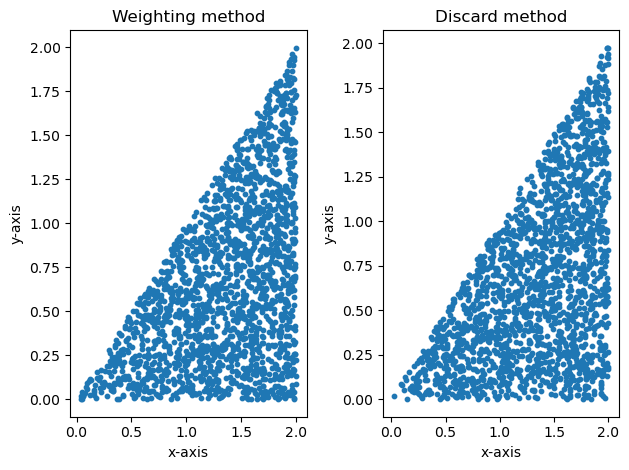

In [4]:
# using subplot function and creating plot one
plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.scatter(xs, ys, s=10)
plt.title('Weighting method')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
 
plt.subplot(1, 2, 2)
 
plt.scatter(xss, yss, s=10)
plt.title('Discard method')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
 
plt.tight_layout()

plt.show()

## (a) proof of when point is inside a triangle

Let $\mathbf{u} \in \mathbb{R}^2, \mathbf{v} \in \mathbb{R}^2 \: \text{and} \: \mathbf{0} \in \mathbb{R}^2$.
Let's consider the convex hull of the set $T =\left\{\mathbf{u}, \mathbf{v}, \mathbf{0} \right\}$. 
By definition, the convex hull of $ T $ noted $ Co(T) $, is the smallest convex set that contains
$ T $. Now, the triangle $ \Delta_T $ spanned by $ T $ is convex and contains $ T $. 
Then $ Co(T) \subseteq \Delta_T $. Now, every convex $ C $ set containing $ T $ must satisfy
$ t \mathbf{u} + (1 - t)\mathbf{v} \in C, t \mathbf{u} \in C, t \mathbf{v} \in C $ for 
$ 0 \leq t \leq 1 $. This means that the boundary of $ \Delta_T $ is contained in $ C $.
But then every convex combination of points $ \partial \Delta_T $ must also be contained in $ C $,
meaning that $ \Delta_T \subseteq C $ for every convex set containing T. In particular, 
$ \Delta_T \subseteq Co(T) $.

Since the convex hull is exactly the set containing all convex combinations of points of $ T $,
$$
\Delta_T = Co(T) = \left\{ \mathbf{x} \in \mathbb{R}^2 : \mathbf{x} = \lambda \mathbf{u} + \mu \mathbf{v} + (1\lambda-\mu)\mathbf{0}, 0 \leq \lambda, \mu \leq 1, 0 \leq 1 - \lambda - \mu \leq 1 \right\}.
$$

We conclude that $ \mathbf{x} \in \mathbb{R}^2 $ is in the triangle spanned by $ T $
if and only if $ \mathbf{x} = \lambda \mathbf{u} + \mu \mathbf{v} $ with
$ 0 \leq \lambda, \mu \leq 1, \: \text{and} \: 0 \leq \lambda + \mu \leq 1 $.


## (b)

In [5]:
def f(x, y):
    if inside(v1, v2, v3, (x,y)):
        return (np.sin(np.pi*x*y))**2
    else:
        return 0
    
#for i in range(1000):
    

In [6]:
def f2(x,y):
    return np.sin(np.pi*x*y)**2

In [7]:
samples = 0
xdata = []
ydata = []
zdata = []
while True:
    
    x = np.random.uniform(0, 2, 1) # Generate x-axis ~ U[0,2]
    y = np.random.uniform(0, 2, 1) # Generate y-axis ~ U[0,2]
    p = (x,y)
    
    U = np.random.uniform(0, 1, 1)
    
    r = f(x,y)
    
    if (U <= r):
        
        xdata.append(x)
        ydata.append(y)
        zdata.append(r)
        
        samples += 1
    
    
    if samples == 2000:
        break


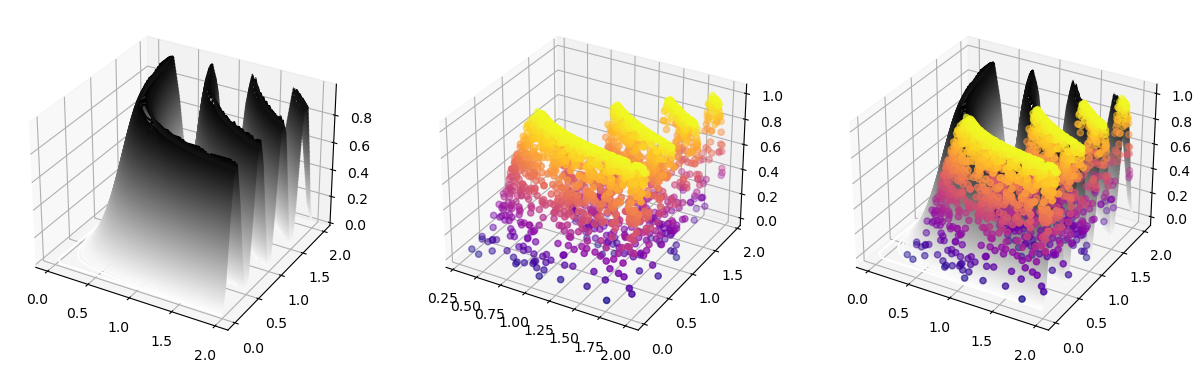

In [8]:
fig, axs = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(15,25))

x = np.linspace(0, 2, 30)
y = np.linspace(0, 2, 30)

X, Y = np.meshgrid(x, y)
Z = f2(X, Y)


axs[0].contour3D(X, Y, Z, 100, cmap='binary')
axs[1].scatter3D(xdata, ydata, zdata, c=zdata, cmap='plasma')
axs[2].contour3D(X, Y, Z, 100, cmap='binary')
axs[2].scatter3D(xdata, ydata, zdata, c=zdata, cmap='plasma')
plt.show()

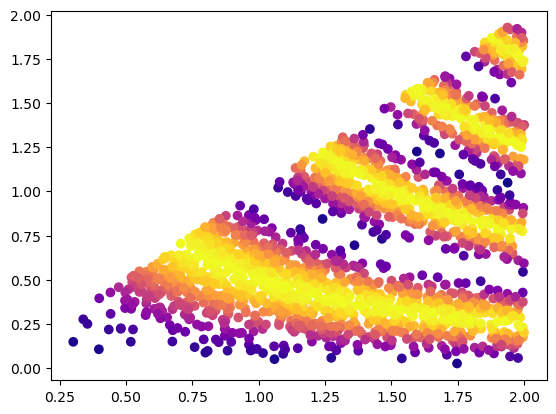

In [9]:
fig = plt.figure()

cmap = plt.colormaps['plasma']
color = cmap(zdata)[..., :3]

plt.scatter(xdata, ydata, c=color)

plt.show()